In [113]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [114]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [115]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [116]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [117]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)


In [118]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [119]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [120]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [121]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

recent_date

('2017-08-23',)

Text(0,0.5,'Inches)


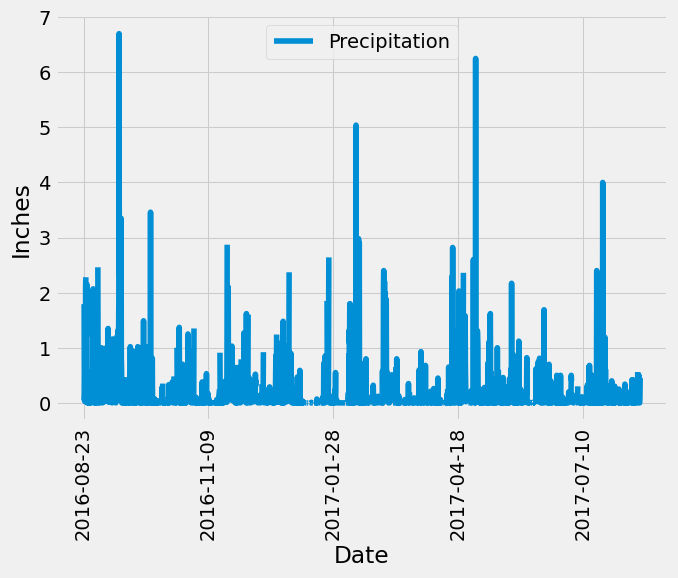

In [122]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

most_recent_date = dt.datetime.strptime(recent_date[0],'%Y-%m-%d').date()

# Calculate the date one year from the last date in data set.
one_year_before_date = most_recent_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_score_and_data = session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date >= one_year_before_date).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by date

prcp_data_df = pd.DataFrame(precipitation_score_and_data, columns=['Date','Precipitation']).\
    sort_values('Date')

#print the this Text(0,0.5,'Inches) before the plot
print("Text(0,0.5,'Inches)")

# Use Pandas Plotting with Matplotlib to plot the data
ax = prcp_data_df.plot(x='Date',y='Precipitation', figsize=(7,6))
ax.grid(True, which='both', linewidth=0.75)

plt.xticks(rotation=90)


plt.legend(loc="upper center")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.tight_layout()
plt.show()


In [123]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_data_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [124]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).all()
total_stations

[(9,)]

In [150]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_station = session.query(Measurement.station,func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

most_active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [108]:
most_active_station[0][0]

'USC00519281'

In [109]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min_max_avg_temp = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station[0][0]).all()

min_max_avg_temp

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')


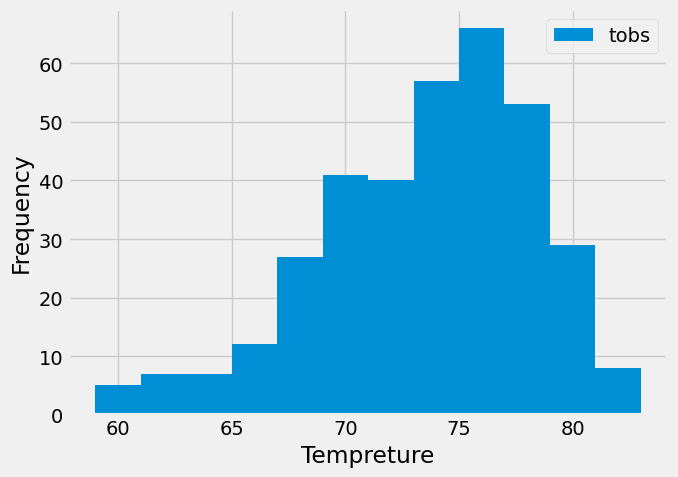

In [110]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_most_active = session.query(Measurement.station,Measurement.tobs).filter(Measurement.station == most_active_station[0][0]).\
    filter(Measurement.date >= one_year_before_date, Measurement.date <= most_recent_date).all()

df = pd.DataFrame(tobs_most_active)
df.set_index('station', inplace = True)

df.plot.hist(bins=12, figsize=(7,5))
plt.xlabel("Tempreture")
plt.ylabel("Frequency")
plt.grid(alpha = 1, linewidth = 1)
print("Text(0.5, 4.183333333333314, 'Temperature')")

plt.tight_layout()
plt.show()

# Close Session

In [111]:
# Close Session
session.close()